## Brian Zhang
### 11/28/24

*** 

#### Q1 Read in the city_sales20.xlsx Download city_sales20.xlsxdata so that the data does not contain any additional text or notes, only the data on offices and sales

In [4]:
import pandas as pd
file = "city_sales20.xlsx"
df = pd.read_excel(file,
                  skiprows=3,
                  skipfooter=4)
print(df.head())

  office  2013  2014  2015  2016  2017  2018  2019  2020
0     NY    45    31    34    56    67    45    67    45
1    BOS    34    23    24    26    25    34    26    22
2    MIA    45    81    43    44    41    45    51    41
3     DC    12    13    15    11    11    18    19    20
4    SEA    52    48    47    41    41    42    44    42


***

#### Q2 Is the dataset in optimal form for analysis in which each column represents a variable/feature? Why or why not?

#### No it is not because right now the format is "wide", which works very well for visual inspection but isn't the best for data analysis. Instead we want to change it into a "long" format using melt(). The dataset should have 3 columns: Office, Year and Sales for optimal analysis.

***

#### Q3 Transform the dataframe so that it contains three columns--city, year, and sales--and save it as a new dataframe called d2

In [5]:
d2 = df.melt(
    id_vars=['office'],  
    var_name='Year',     
    value_name='Sales' )  
print(d2.head())

  office  Year  Sales
0     NY  2013     45
1    BOS  2013     34
2    MIA  2013     45
3     DC  2013     12
4    SEA  2013     52


***

#### Q4 Determine which office in the data had the highest mean sales between 2014 and 2020 (inclusive)


In [6]:
filtered_data = d2[(d2['Year'] >= 2014) & (d2['Year'] <= 2020)]
mean_sales = filtered_data.groupby('office')['Sales'].mean().reset_index()
highest_mean_sales_office = mean_sales.loc[mean_sales['Sales'].idxmax()]
print(highest_mean_sales_office)

office          MIA
Sales     49.428571
Name: 3, dtype: object


#### Mia has the highest mean sales

***

#### Q5 Calculate and plot mean sales by year across all offices

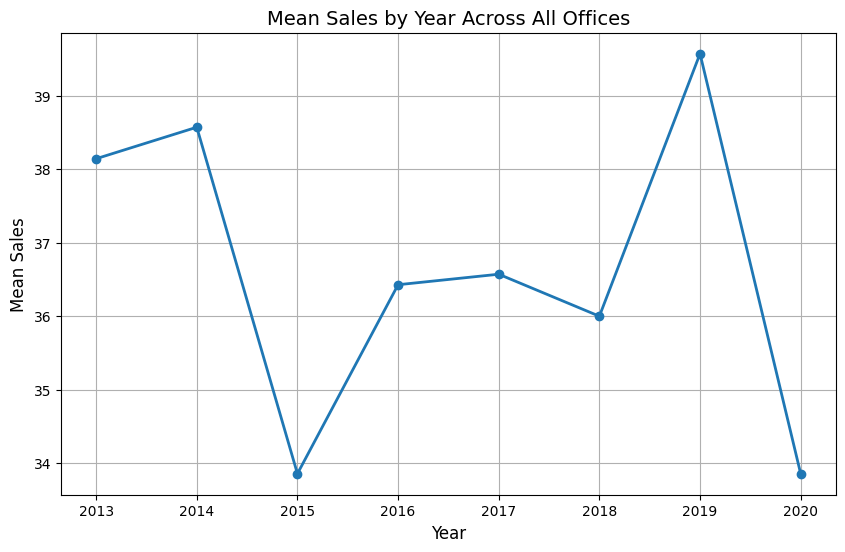

In [9]:
import matplotlib.pyplot as plt
mean_sales_by_year = d2.groupby('Year')['Sales'].mean().reset_index()

# Plot the mean sales by year
plt.figure(figsize=(10, 6))
plt.plot(mean_sales_by_year['Year'], mean_sales_by_year['Sales'], marker='o', linestyle='-', linewidth=2)
plt.title('Mean Sales by Year Across All Offices', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Sales', fontsize=12)
plt.grid(True)
plt.show()

***

#### Q6 Plot (with altair or seaborn) the sales overtime in a line plot and color the lines by office

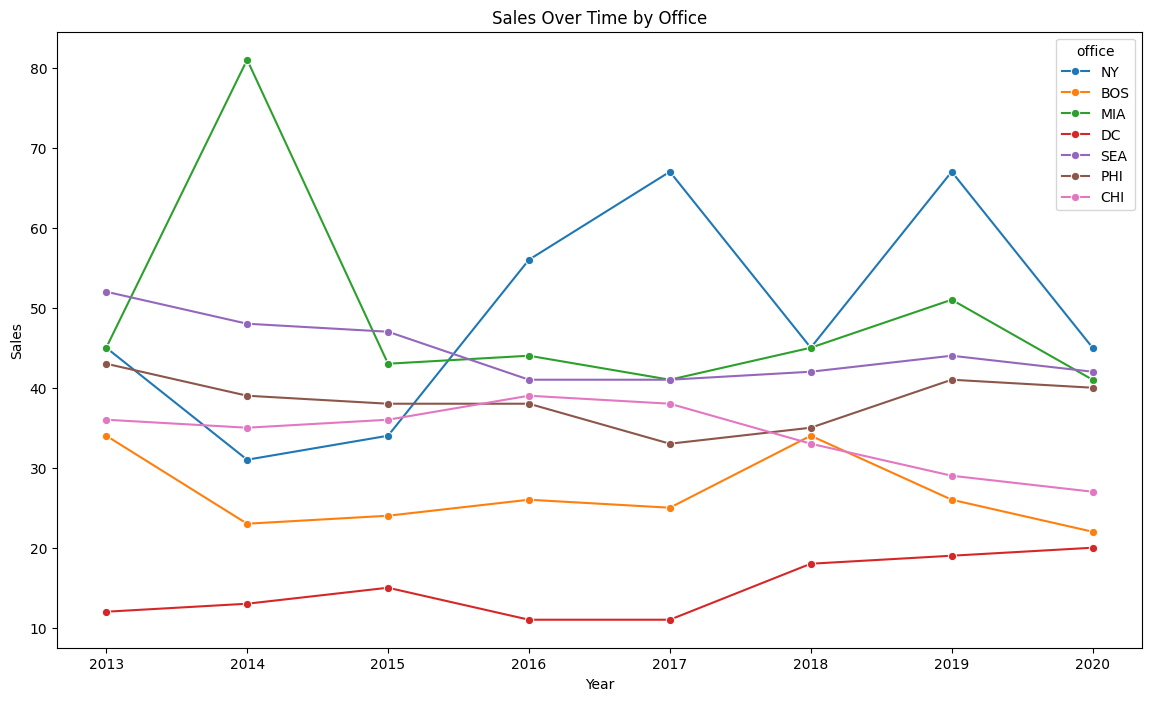

In [17]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(data=d2, x='Year', y='Sales', hue='office', marker='o')
plt.title('Sales Over Time by Office')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

***

#### Q7 Every year, this dataset is updated with new data. Define a function called "clean_sales" that takes a file name, reads in the data so that there are no missing values and the result contains only the data on offices and sales and no additional text or notes, and then transforms the dataframe so that it contains three columns: city, year, and sales. The function should return the dataframe with three columns: city, year, sales

In [28]:
def clean_sales(file_name):
    df = pd.read_excel(file_name, skiprows=3, skipfooter=4)
    df = df.dropna(how='all')  
    df = df.dropna(axis=1, how='all')  
    d2 = df.melt(
        id_vars=['office'],  
        var_name='Year',     
        value_name='Sales'
    )    
    return d2

***

#### Q8: Apply the function to another dataset--city_sales21.xlsx Download city_sales21.xlsx--and create the a dataframe called d21 with the result. Return the last five rows of d21

In [29]:
d21 = clean_sales("city_sales21.xlsx")
print(d21.tail())

   office  Year  Sales
58    MIA  2021     74
59     DC  2021     20
60    SEA  2021     37
61    PHI  2021     32
62    CHI  2021     28


***

#### Q9 Use seaborn or altair to create a sorted (low to high) bar plot of the sales data by office from 2021. Which office has the highest sales?

#### The MIA Office has the highest sale

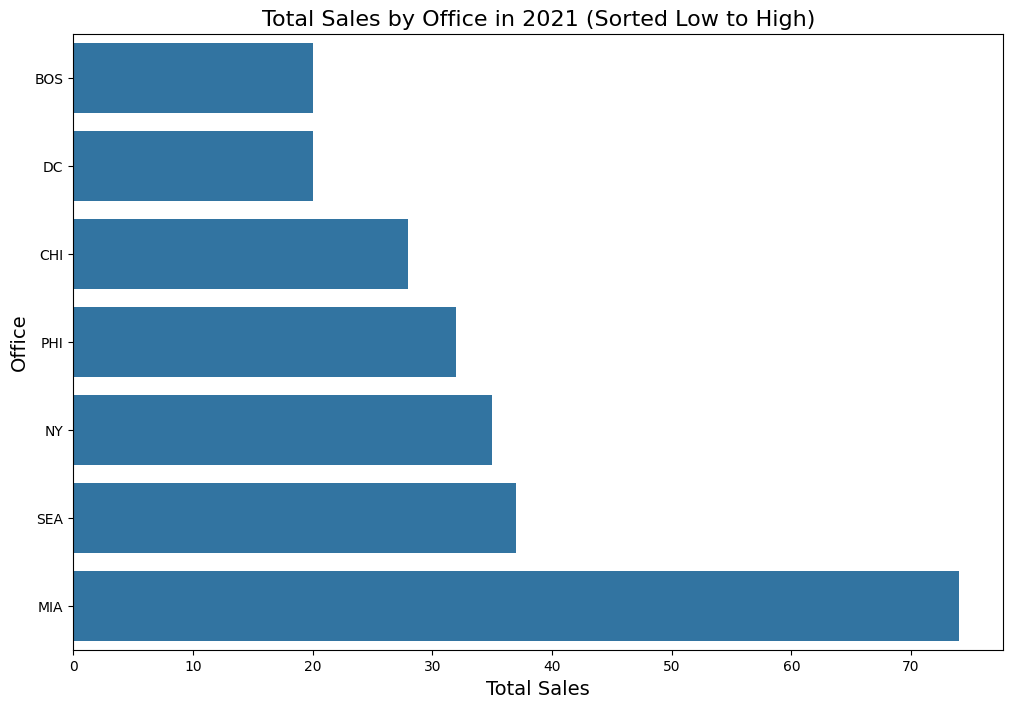

In [32]:
sales_2021 = d21[d21['Year'] == 2021]
mean_sales_2021 = sales_2021.groupby('office')['Sales'].sum().reset_index().sort_values(by='Sales')

plt.figure(figsize=(12, 8))
sns.barplot(data=mean_sales_2021, x='Sales', y='office')
plt.title('Total Sales by Office in 2021 (Sorted Low to High)', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Office', fontsize=14)
plt.show()

***

#### Q10 Using d21, what are the top five best performing year-city combinations


In [33]:
top_five_year_city_combinations = d21.sort_values(by='Sales', ascending=False).head(5)
print("Top five best performing year-city combinations:")
print(top_five_year_city_combinations)

Top five best performing year-city combinations:
   office  Year  Sales
9     MIA  2014     81
58    MIA  2021     74
28     NY  2017     67
42     NY  2019     67
21     NY  2016     56
